In [2]:
#  We start by importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [3]:
retail_df = pd.read_excel("Online Retail.xlsx")
# Printing the shape of our dataset
print("The shape of our dataset is: ", retail_df.shape)

The shape of our dataset is:  (541909, 8)


In [ ]:
# Set plot style
sns.set(style="whitegrid")

In [4]:
# Display the first few rows of the dataset
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
retail_df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France



Now, let's explore our dataset first by getting more information about rows and columns.

In [6]:
# Check data types and missing values
retail_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The **CustomerID** column seems to have lesser number of values as compared to the rest of the columns. Also the **Description** column as well, This needs to be considered during analysis.

In [7]:
# Here we are exploring the quantities of various attributes, we do that by looking at the unique values.
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


We can see that there are almost 25% missing values in the **CustomerID** column.

The Retail Online Dataframe seems to contain eight variables corresponding to:

**InvoiceNo**: Invoice number. ***Nominal Variable***, a 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation.** <br>
**StockCode**: Product (item) code. ***Nominal Variable***, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. ***Nominal Variable***. <br>
**Quantity**: The quantities of each product (item) per transaction. ***Numeric Variable***.<br> 
**InvoiceDate**: Invoice Date and time. ***Numeric Variable***, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. ***Numeric Variable***, Product price per unit in sterling. <br>
**CustomerID**: Customer number. ***Nominal Variable***, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. ***Nominal Variable***, the name of the country where each customer resides.<br>

In [8]:
# Descriptive statistics for numerical columns
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


We can see that there seems to be some negitive values present inside the dataframe. For Example, the quantity of -80995 corrensponding to the minimum **Quantity**.

This could be due to cancelled transactions or maybe transactions that got returned. But this is just an Assumption needs to be verified.

In the description of the dataset, it says that the InvoiceNo starting with the letter "c" refers to "cancelled". Let's see if our assumption is correct about the negative quantities(**-80995**). <br>
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [10]:
# Now we will get the cancelled transactions based on the presence of "c" in the InvoiceNo
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


As expected, the InvoiceNo contains "C".
Now let's see if there are any positive quantities in the cancelled_orders series that we extracted to further satisfy our assumption.

In [12]:
cancelled_orders[cancelled_orders['Quantity']>0] # Checking if there is any positive quantity.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


As expected, negative values mean cancelled quantity because there are no positive value for orders where InvoiceNo has "C" as the Prefix. <br>
**Now lets check, How many cancelled orders do we have?** 

In [20]:
# Moving on we check how many rows our dataframe of cancelled orders contain
# and then we compute the percentage of cancelled orders
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print("There are a total of",len(cancelled_orders),"cancelled orders, which is: {}/{} = {:.2f}%. ".format(cancelled_number, total_orders, cancelled_number/total_orders*100))

There are a total of 9288 cancelled orders, which is: 9288/25900 = 35.86%. 


### What's the average number of orders per customer?

In [21]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [22]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The mean orders per customer as seen in the output above are 5.
### What's the average number of unique items per order?

In [23]:
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [24]:
groupby_invoice.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [25]:
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [26]:
temp_df =retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [27]:
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


/tmp/ipykernel_4175/3403752528.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groupby_invoice['productsNumber'],ax=ax)


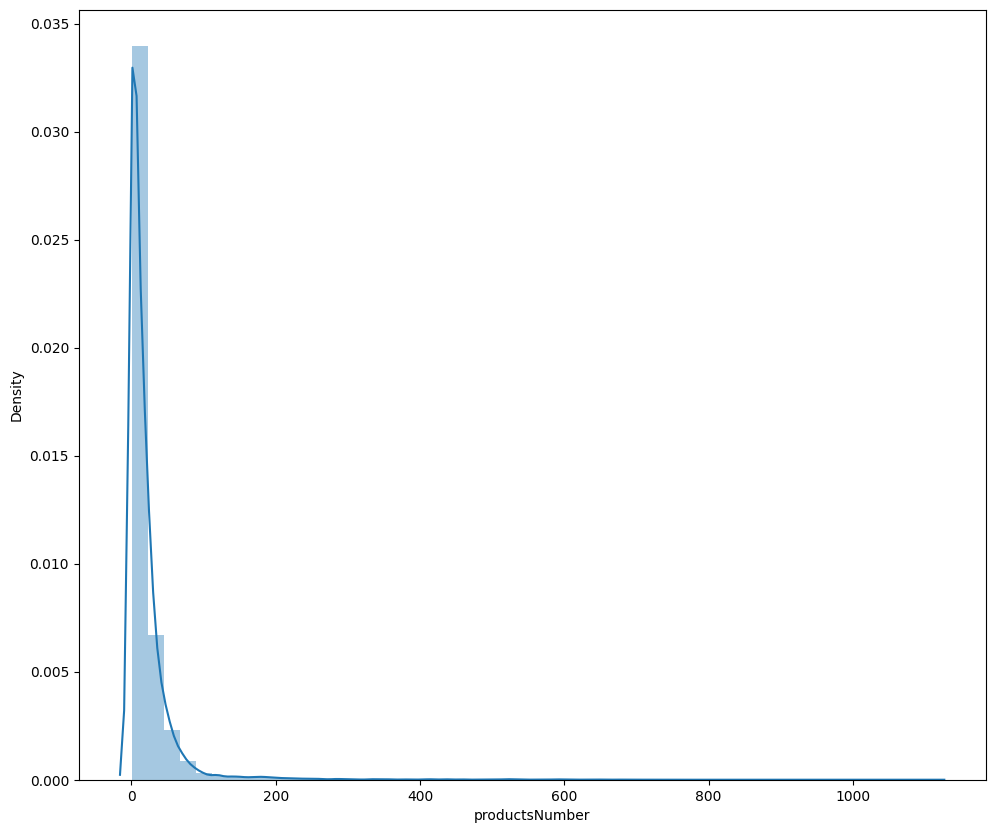

In [32]:
#Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()

We can see from the above plot that the distribution seems to be skewed with more than 90 percent population appearing below the products number of 100. We can safely conclude that most of the customers buying less than **50** products.  

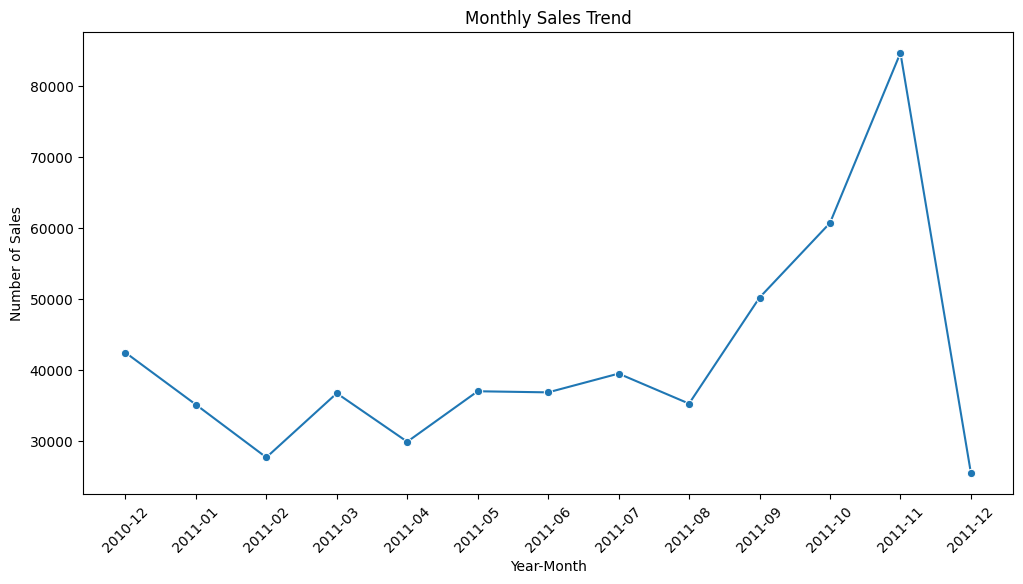

In [45]:
# Convert 'InvoiceDate' to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract year and month
retail_df['YearMonth'] = retail_df['InvoiceDate'].dt.to_period('M')

# Monthly sales trend
monthly_sales = retail_df.groupby('YearMonth')['InvoiceNo'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

## Customers by country
We set off by having a visual glance of how customers line up by country.

/tmp/ipykernel_4175/751849034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='viridis')


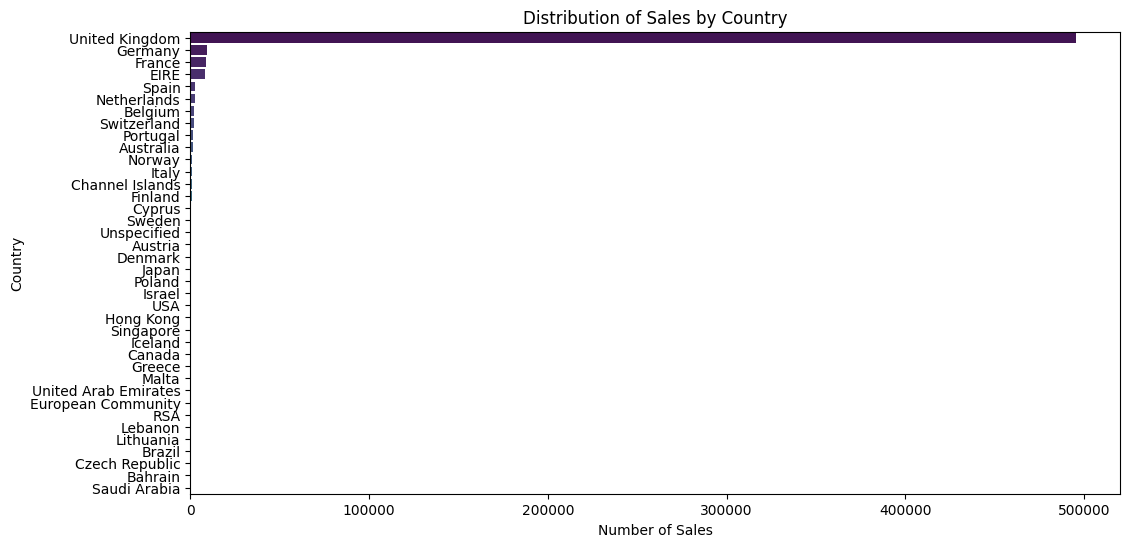

In [33]:
# Distribution of sales by country
plt.figure(figsize=(12, 6))
sales_by_country = retail_df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='viridis')
plt.title('Distribution of Sales by Country')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.show()

As we can see, most of the customers are from the United Kingdom, Let's have a look at whether this trend holds for the sales revernue per country as well.

In [35]:
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


/tmp/ipykernel_4175/1565351635.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")


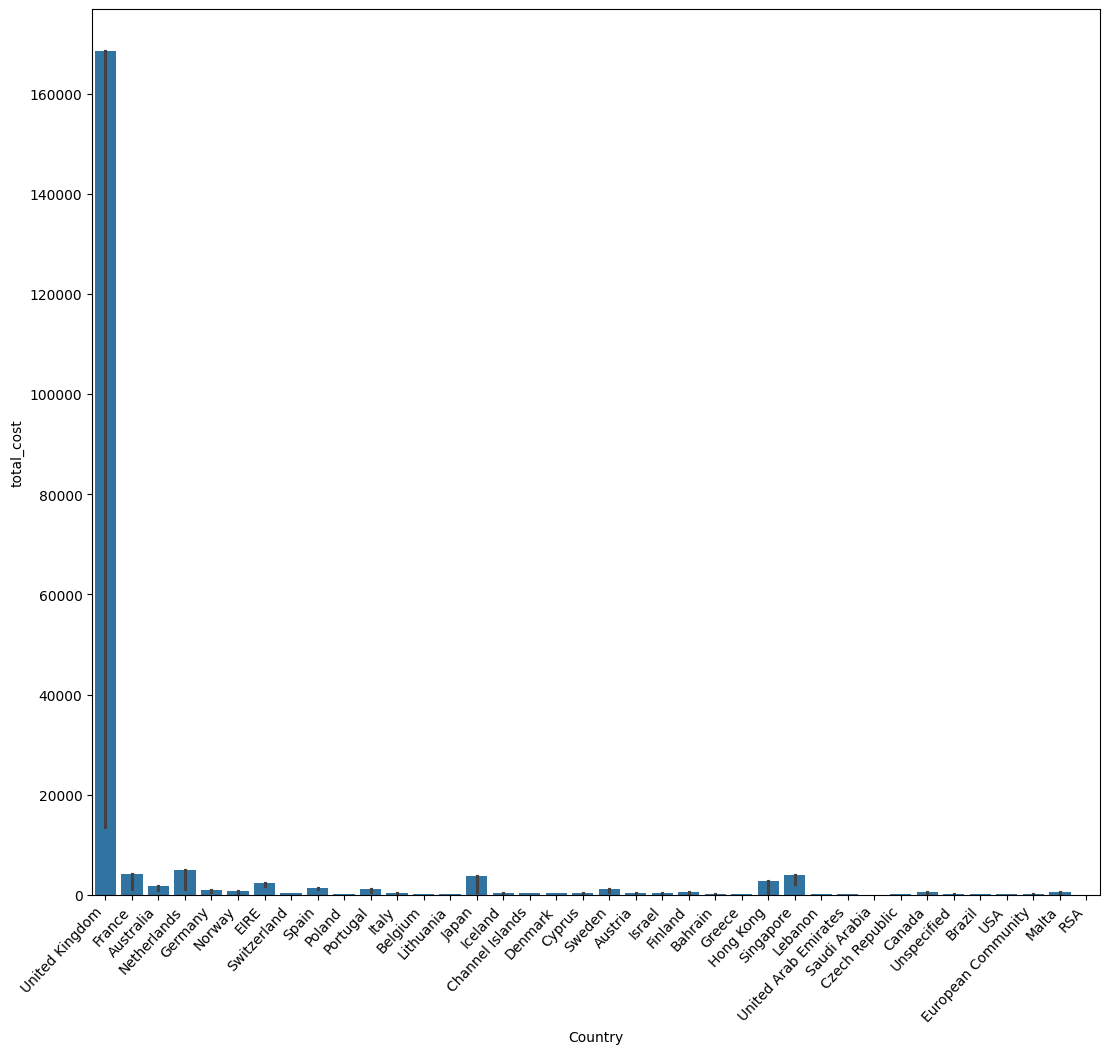

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()


In [41]:
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

The trend indeed holds for the revenue per country as well. United Kingdom is the single biggest market in terms of the number of customers and the sales in this dataset.
Below are the statistics for the United Kingdom.

## Data for United Kingdom

In [44]:
# Extracting a dataframe for UK alone.
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,total_cost
count,495478.000000,495478,495478.000000,361878.000000,495478.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368,16.525065
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000,3.290000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000,8.290000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000,16.630000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000,168469.600000
std,227.588756,NaN,99.315438,1594.402590,394.839116


In [49]:
# Displaying data for UK

print("Sales data for UK:")
print("Total transactions:", retail_uk['InvoiceNo'].nunique())
print("Total products bought:",retail_uk['StockCode'].nunique())
print("Total customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of missing customers (NA):", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Total countries(should be 1 since only showing for UK):',retail_uk['Country'].nunique())

Sales data for UK:
Total transactions: 23494
Total products bought: 4065
Total customers: 3950
Percentage of missing customers (NA): 26.96 %
Total countries(should be 1 since only showing for UK): 1


**What are the products that are most bought in UK?**

In [50]:
retail_uk.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_cost', 'YearMonth'],
      dtype='object')

In [53]:
# Showing the products in decreasing quantity purchased in UK
groupedProduct = retail_uk.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,Description,Quantity
3988,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
1858,JUMBO BAG RED RETROSPOT,43167
2725,POPCORN HOLDER,34365
242,ASSORTED COLOUR BIRD ORNAMENT,33679
3898,WHITE HANGING HEART T-LIGHT HOLDER,33193
2350,PACK OF 12 LONDON TISSUES,25307
2384,PACK OF 72 RETROSPOT CAKE CASES,24702
3728,VICTORIAN GLASS HANGING T-LIGHT,23242
584,BROCADE RING PURSE,22801
250,ASSORTED COLOURS SILK FAN,20322


# Product Association
Here we will use the Apriori algorithm to find frequent itemsets and generate association rules. And then we will preprocess the data to create a binary matrix suitable for association analysis. Since, most UK has the most customers therefore, we are filtering out for UK here.

In [54]:
# Product association using Apriori algorithm (you may need to install mlxtend)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Preprocess data for association analysis, filtering United Kingdom
basket = (retail_df[retail_df['Country'] == 'United Kingdom']
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to binary values (0 or 1)
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)
# # Convert quantities to boolean values (True or False)
basket = basket.map(lambda x: x > 0)


# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display association rules
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039746,0.042196,0.025544,0.642694,15.231158,0.023867,2.680627,0.973019
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.042196,0.039746,0.025544,0.605376,15.231158,0.023867,2.433341,0.975508
2,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.030581,0.041062,0.021733,0.710682,17.307671,0.020478,3.314484,0.971945
3,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.041062,0.030581,0.021733,0.529282,17.307671,0.020478,2.059447,0.982568
4,(CHARLOTTE BAG SUKI DESIGN),(RED RETROSPOT CHARLOTTE BAG),0.036479,0.041062,0.021552,0.590796,14.388005,0.020054,2.343424,0.965727


According to the results a customer is 15 times more likely to buy an **ALARM CLOCK BAKELIKE RED** than an average customer (lift) if they buy **ALARM CLOCK BAKELIKE GREEN**. This rule is true in approx 65% of the cases. This valuable data insight can be used to recommend **ALARM CLOCK BAKELIKE RED** alongside **ALARM CLOCK BAKELIKE GREEN**.

This rule is also true for this pair vise versa with a confidence of 60%.

The **rules** dataframe contains futher rules as well. Hence we are saving this dataframe as insights drawn from the Online Retail data.

In [58]:
# rules.to_csv('association_rules.csv', index=False)

# Save to Excel
rules.to_excel('association_rules.xlsx', index=False)


/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

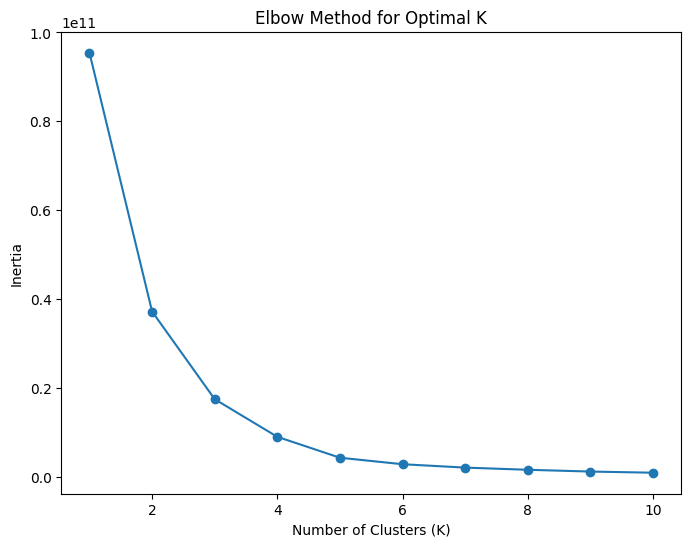

In [59]:
# Preprocess data for clustering
customer_data = retail_df.groupby('CustomerID')['Quantity'].sum().reset_index()

# Perform k-means clustering (you may need to install scikit-learn)
from sklearn.cluster import KMeans

# Use the "Elbow Method" to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data[['Quantity']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


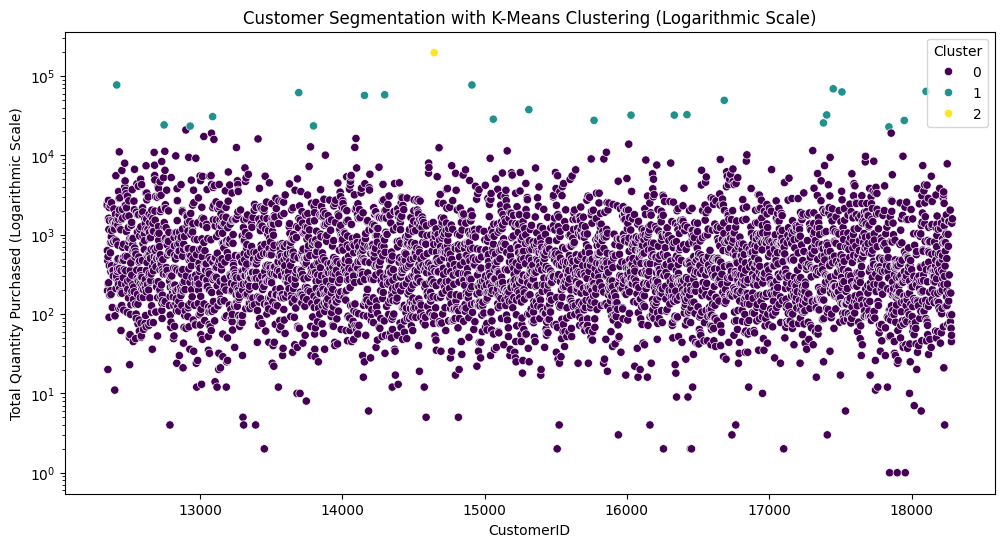

In [56]:
# Choose the optimal number of clusters
optimal_k = 3  # You can replace this with the actual optimal number of clusters

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Quantity']])

# Visualize the clusters with a logarithmic y-axis, lofrithmic because the linear scale is quite skewed.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CustomerID', y='Quantity', hue='Cluster', data=customer_data, palette='viridis')
plt.yscale('log')  # Set y-axis to a logarithmic scale
plt.title('Customer Segmentation with K-Means Clustering (Logarithmic Scale)')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased (Logarithmic Scale)')
plt.legend(title='Cluster')
plt.show()